## Credit Card Fraud Detection Using Neural Network

In [60]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn 
import torch.optim as optim
import torch.utils
import torch.utils.data

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [61]:
data = pd.read_csv('../data/fraudTrain.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [62]:
pd.options.display.max_columns = None
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [63]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

1. Dropping the unwanted columns

In [64]:
# 1. Dropping the unwanted columns
data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
           'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'dob',
           'trans_num', 'unix_time', 'merch_lat', 'merch_long'], inplace=True, axis=1
        )

In [65]:
data.head()

,category,amt,gender,state,city_pop,job,is_fraud
0,misc_net,4.97,F,NC,3495,"Psychologist, counselling",0
1,grocery_pos,107.23,F,WA,149,Special educational needs teacher,0
2,entertainment,220.11,M,ID,4154,Nature conservation officer,0
3,gas_transport,45.00,M,MT,1939,Patent attorney,0
4,misc_pos,41.96,M,VA,99,Dance movement psychotherapist,0


2. Checking for missing values

In [66]:
data.isnull().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
job         0
is_fraud    0
dtype: int64

In [67]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 7 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   category  1296675 non-null  object 
 1   amt       1296675 non-null  float64
 2   gender    1296675 non-null  object 
 3   state     1296675 non-null  object 
 4   city_pop  1296675 non-null  int64  
 5   job       1296675 non-null  object 
 6   is_fraud  1296675 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 69.3+ MB
None


3. Converting categorical values to numerical values

In [68]:
# 3. converting categorical values to numerical values
data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [69]:
category_df = (pd.get_dummies(data['category'],)).astype(int) # this is one hot encoding using pandas with get_dummies

In [70]:
category_df.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
data.drop('category', inplace=True, axis=1)

In [72]:
data.head()

,amt,gender,state,city_pop,job,is_fraud
0,4.97,F,NC,3495,"Psychologist, counselling",0
1,107.23,F,WA,149,Special educational needs teacher,0
2,220.11,M,ID,4154,Nature conservation officer,0
3,45.00,M,MT,1939,Patent attorney,0
4,41.96,M,VA,99,Dance movement psychotherapist,0


In [73]:
df = pd.concat([data, category_df], axis=1)

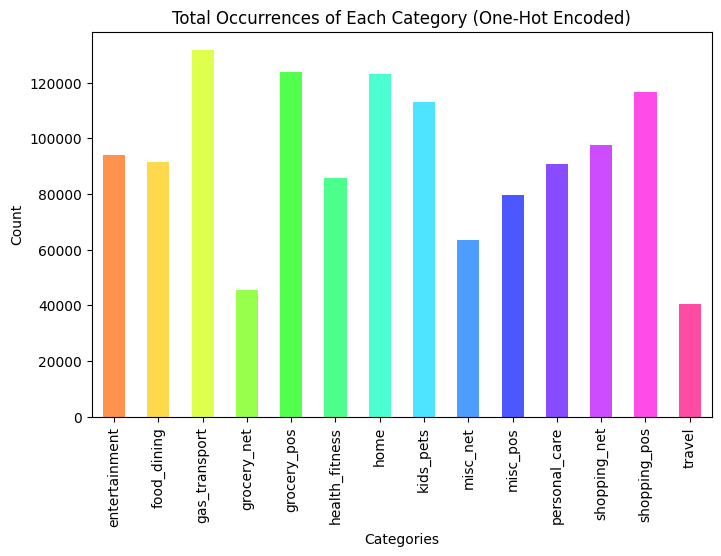

In [74]:
num_categories = len(category_df.columns)
colors = sns.color_palette("hsv", num_categories)

category_df.sum().plot(kind='bar', figsize=(8, 5), color=colors, alpha=0.7)
plt.title("Total Occurrences of Each Category (One-Hot Encoded)")
plt.ylabel("Count")
plt.xlabel("Categories")
plt.show()


In [75]:
df.head()

,amt,gender,state,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,F,NC,3495,"Psychologist, counselling",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,F,WA,149,Special educational needs teacher,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,M,ID,4154,Nature conservation officer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,M,MT,1939,Patent attorney,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,M,VA,99,Dance movement psychotherapist,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [76]:
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [77]:
df['gender'].replace({'M': 0, 'F': 1}, inplace=True)

C:\Users\USer\AppData\Local\Temp\ipykernel_11688\772758906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'M': 0, 'F': 1}, inplace=True)
C:\Users\USer\AppData\Local\Temp\ipykernel_11688\772758906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'M'

In [78]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [79]:
df['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [80]:
state_df = (pd.get_dummies(df['state'])).astype(int)

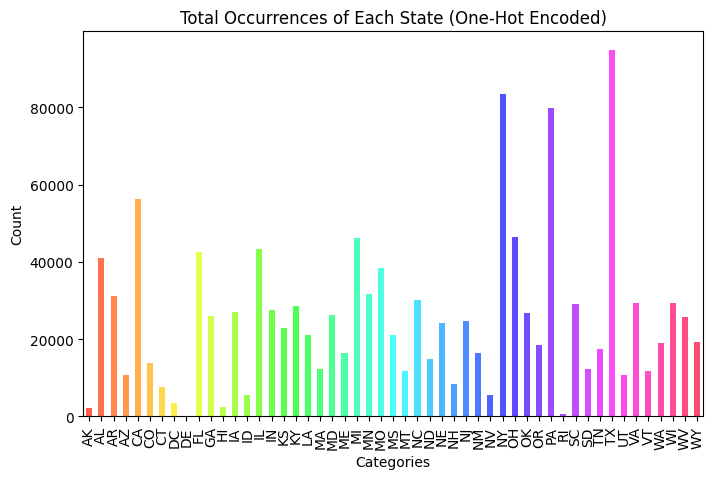

In [81]:
num_categories = len(state_df.columns)
colors = sns.color_palette("hsv", num_categories)

plt.figure(figsize=(8, 20))

state_df.sum().plot(kind='bar', figsize=(8, 5), color=colors, alpha=0.7)
plt.title("Total Occurrences of Each State (One-Hot Encoded)")
plt.ylabel("Count")
plt.xlabel("Categories")
plt.show()


In [82]:
state_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [83]:
df.drop('state', inplace=True, axis=1)

In [84]:
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,4.97,1,3495,"Psychologist, counselling",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,1,149,Special educational needs teacher,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,0,4154,Nature conservation officer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939,Patent attorney,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99,Dance movement psychotherapist,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
df = pd.concat([df, state_df], axis=1)
df.head()

,amt,gender,city_pop,job,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,4.97,1,3495,"Psychologist, counselling",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107.23,1,149,Special educational needs teacher,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,220.11,0,4154,Nature conservation officer,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,0,1939,Patent attorney,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41.96,0,99,Dance movement psychotherapist,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [86]:
df['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [87]:
df['job'].unique().shape

(494,)

In [88]:
job_df = (pd.get_dummies(df['job'])).astype(int)

In [89]:
job_df.head()

,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial","Buyer, retail",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communications","Engineer, control and instrumentation","Engineer, drilling","Engineer, electronics","Engineer, land","Engineer, maintenance","Engineer, manufacturing","Engineer, materials","Engineer, mining","Engineer, petroleum","Engineer, production","Engineer, site","Engineer, structural","Engineer, technical sales",Engineering geologist,Englis

In [90]:
df.drop('job', inplace=True, axis=1)

In [91]:
df = pd.concat([df, job_df], axis=1)

In [92]:
df.shape

(1296675, 563)

In [93]:
df.head()

,amt,gender,city_pop,is_fraud,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial","Buyer, retail",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communica

4. Dividing the dataset

In [94]:
# 4. Dividing the dataset

X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [95]:
X.shape, y.shape

((1296675, 562), (1296675,))

In [96]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial","Buyer, retail",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communications","E

In [97]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Text(0.5, 1.0, 'Class Distribution')

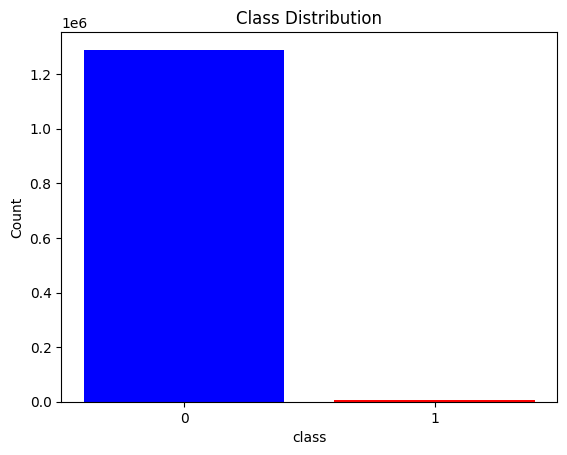

In [98]:
class_counts = data['is_fraud'].value_counts().sort_index()

# Plot using plt.bar
plt.bar(class_counts.index, class_counts.values, color=['Blue', 'Red'])

# Customize labels and title
plt.xticks([0, 1], ['0', '1'])  # Set class labels on x-axis
plt.xlabel("class")
plt.ylabel("Count") 
plt.title("Class Distribution")

In [99]:
# X_converted.shape, y.shape
X = X.astype('float32')

5. Handling imbalanced dataset

In [ ]:
# Handling imbalanced dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [ ]:
data = pd.concat([X, y], axis=1)

sns.countplot(x='is_fraud', data=data)
plt.title("Class Distribution")
plt.show()

In [101]:
y.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

6. Data normalization

In [ ]:
# 6. Data normalization
X.describe()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial","Buyer, retail",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communications","E

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [ ]:
X.head()

,amt,gender,city_pop,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Academic librarian,"Accountant, chartered","Accountant, chartered certified","Accountant, chartered public finance",Accounting technician,Acupuncturist,Administrator,"Administrator, arts","Administrator, charities/voluntary organisations","Administrator, education","Administrator, local government",Advertising account executive,Advertising account planner,Advertising copywriter,Advice worker,Aeronautical engineer,Agricultural consultant,Aid worker,Air broker,Air cabin crew,Air traffic controller,Airline pilot,Ambulance person,Amenity horticulturist,Analytical chemist,Animal nutritionist,Animal technologist,Animator,Applications developer,Arboriculturist,Archaeologist,Architect,Architectural technologist,Archivist,Armed forces logistics/support/administrative officer,Armed forces technical officer,Armed forces training and education officer,Art gallery manager,Art therapist,Artist,Arts development officer,Associate Professor,Audiological scientist,Barista,Barrister,Barrister's clerk,"Biochemist, clinical",Biomedical engineer,Biomedical scientist,Bookseller,Broadcast engineer,Broadcast journalist,Broadcast presenter,Building control surveyor,Building services engineer,Building surveyor,"Buyer, industrial","Buyer, retail",Cabin crew,Call centre manager,Camera operator,Careers adviser,Careers information officer,Cartographer,Catering manager,Ceramics designer,Charity fundraiser,Charity officer,Chartered accountant,Chartered legal executive (England and Wales),Chartered loss adjuster,Chartered public finance accountant,Chemical engineer,"Chemist, analytical",Chief Executive Officer,Chief Financial Officer,Chief Marketing Officer,Chief Operating Officer,Chief Strategy Officer,Chief Technology Officer,Chief of Staff,Child psychotherapist,Chiropodist,Civil Service administrator,Civil Service fast streamer,"Civil engineer, contracting",Claims inspector/assessor,Clinical biochemist,Clinical cytogeneticist,Clinical psychologist,Clinical research associate,Clothing/textile technologist,Colour technologist,Commercial horticulturist,Commercial/residential surveyor,Commissioning editor,Communications engineer,Community arts worker,Community development worker,Community education officer,Community pharmacist,Company secretary,Comptroller,"Conservation officer, historic buildings","Conservator, furniture","Conservator, museum/gallery",Contracting civil engineer,Contractor,Control and instrumentation engineer,Copy,"Copywriter, advertising",Corporate investment banker,Counselling psychologist,Counsellor,Curator,Cytogeneticist,Dance movement psychotherapist,Dancer,Data scientist,Database administrator,Dealer,"Designer, ceramics/pottery","Designer, exhibition/display","Designer, furniture","Designer, industrial/product","Designer, interior/spatial","Designer, jewellery","Designer, multimedia","Designer, television/film set","Designer, textile","Development worker, community","Development worker, international aid",Diagnostic radiographer,Dispensing optician,"Doctor, general practice","Doctor, hospital",Drilling engineer,Early years teacher,Ecologist,Economist,"Editor, commissioning","Editor, film/video","Editor, magazine features",Education administrator,"Education officer, community","Education officer, museum",Educational psychologist,Electrical engineer,Electronics engineer,"Embryologist, clinical",Emergency planning/management officer,Energy engineer,Energy manager,"Engineer, aeronautical","Engineer, agricultural","Engineer, automotive","Engineer, biomedical","Engineer, broadcasting (operations)","Engineer, building services","Engineer, civil (consulting)","Engineer, civil (contracting)","Engineer, communications","E

7. Train - Test split

In [42]:
# 7. Train - Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape

((1134468, 562), (283617, 562))

In [ ]:
y_train.value_counts()

is_fraud
0    1031335
1     103133
Name: count, dtype: int64

In [45]:
y_test.value_counts()

is_fraud
0    257834
1     25783
Name: count, dtype: int64

## Build Model

In [47]:
X_train.shape, y_train.shape

((1134468, 562), (1134468,))

## Build Model

1. ANN

* Custom dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

* Data_loader

In [ ]:
dataset = MyDataset(X_train, y_train)
dataloader_train = DataLoader(dataset, batch_size=200, shuffle=True)
for i, (x, y) in enumerate(dataloader_train):
    print(f"Batch {i}: Input_dim: {x.size()}, Output_dim: {y.size()}")

* Build model ANN

In [ ]:
class CFraud(nn.Module):
    def __init__(self, layers_sz, in_sz, out_sz):
        super(CFraud, self).__init__()
        layers = []
        for sz in layers_sz:
            layers.append(nn.Linear(in_sz, sz))
            in_sz = sz
        self.linears = nn.ModuleList(layers)
        self.out = nn.Linear(layers_sz[-1], out_sz)
        self.act_func = nn.ReLU()
        self.output_activation = nn.Sigmoid()
    
    def forward(self, x):
        for layer in self.linears:
            x = self.act_func(layer(x))
        x = self.output_activation(self.out(x))
        return x

* Setting Hyper Parameters

In [ ]:
input_size = X_train.shape[1]
layers_sz = [300, 150]
output_size = 1 # class
ann_model = CFraud(layers_sz, input_size, output_size)
batch_size = 200
print(ann_model)

* Train model

In [ ]:
# Define loss and optimizer
cost_function = nn.BCELoss()
optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
batch_size = 200 
loss_values = []

for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(dataloader_train):
        # Forward pass
        output_from_model = ann_model(x_batch)
        loss = cost_function(output_from_model, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_values.append(loss.item())
    
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item(): .4f}')

torch.save(ann_model.state_dict(), f'my_model_epoch_{num_epochs}.pt')
print("Finished Training!")

* Visualize Loss Function

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_values, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

2. Logistic Regression

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression(random_state=42)
lg_model.fit(X_train, y_train)

lg_pred = lg_model.predict(X_test)

3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

## Model Evaluation

In [ ]:
def evaluate_model(y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix:\n{confusion_mat}')

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

In [ ]:
print("Logistic Regression")
evaluate_model(y_test, lg_pred)

In [ ]:
print("Random Forest")
evaluate_model(y_test, rf_pred)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

ann_model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

test_dataset = MyDataset(X_test, y_test)
dataloader_test = DataLoader(test_dataset, batch_size=200, shuffle=False)

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in dataloader_test:
        # Forward pass
        outputs = ann_model(inputs)
        preds = (outputs.squeeze() > 0.5).float()  # Convert probabilities to binary predictions
        
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
roc_auc = roc_auc_score(all_labels, all_preds)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(all_labels, all_preds))


Accuracy: 0.9938
Precision: 0.9825
Recall: 0.9484
F1-Score: 0.9651
ROC-AUC: 0.9733

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    257834
         1.0       0.98      0.95      0.97     25783

    accuracy                           0.99    283617
   macro avg       0.99      0.97      0.98    283617
weighted avg       0.99      0.99      0.99    283617



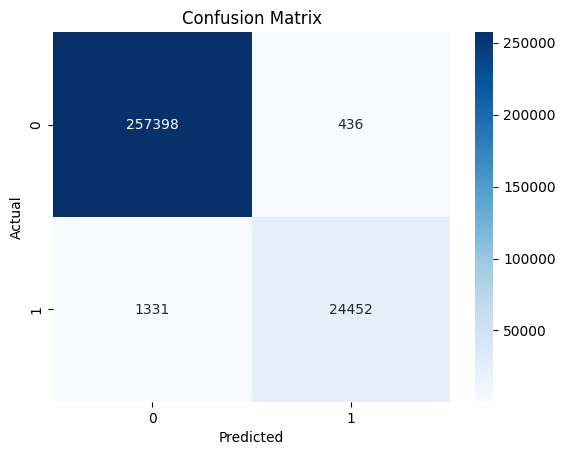

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(all_preds, all_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [56]:
# 10. Saving the model
#torch.save(model.state_dict(), f'../models/model_1.pt')

In [ ]:
import joblib

joblib.dump(lg_model, 'lg_model1.pt')
joblib.dump(rf_model, 'rf_model1.pt')

In [ ]:
model = joblib.load('lg_model1.pt')

pred = model.predict(X_test)

In [ ]:
pred[:]

## Interpretability 

In [ ]:
# Logistic 
import shap

explainer = shap.LinearExplainer(lg_model, X_train)
lg_shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(lg_shap_values, X_test)

In [ ]:
explainer = shap.TreeExplainer(rf_model, X_train)
lg_shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(lg_shap_values, X_test)

In [ ]:
explainer = shap.DeepExplainer(ann_model, X_train)
lg_shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(lg_shap_values, X_test)